# Palmer Penguins Modeling

Import the Palmer Penguins dataset and print out the first few rows.

Suppose we want to predict `bill_depth_mm` using the other variables in the dataset.

Which variables would we need to **dummify**?

In [106]:
import pandas as pd
from palmerpenguins import load_penguins

In [107]:
penguins = load_penguins()
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


In [108]:
penguins = pd.get_dummies(penguins)

Dummy variables: species, island, sex

Let's use `bill_length_mm` to predict `bill_depth_mm`. Prepare your data and fit the following models on the entire dataset:

* Simple linear regression (e.g. straight-line) model
* Quadratic (degree 2 polynomial) model
* Cubic (degree 3 polynomial) model
* Degree 10 polynomial model

Make predictions for each model and plot your fitted models on the scatterplot.

In [109]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

knn = KNeighborsRegressor()
lr = LinearRegression()
dt = DecisionTreeRegressor()

In [110]:
penguins = penguins[['bill_length_mm', 'bill_depth_mm']].dropna()

In [111]:
X = penguins[['bill_length_mm']]
y = penguins['bill_depth_mm']

In [112]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

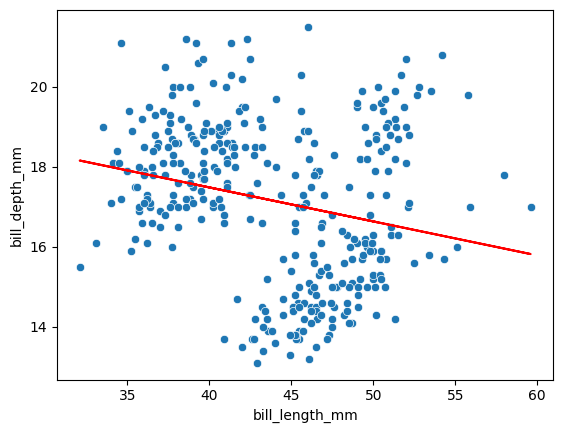

In [113]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

lr.fit(X, y)
line1 = lr.predict(X)

plt.figure
sns.scatterplot(x=X['bill_length_mm'], y=y)
plt.plot(X, line1, color='red')

#under fitting

In [114]:
from sklearn.metrics import mean_squared_error

lr_fit = lr.fit(X_train, y_train)
lr_fit.coef_
y_pred_lr = lr_fit.predict(X_test)
mean_squared_error(y_test, y_pred_lr)

3.74459677572586

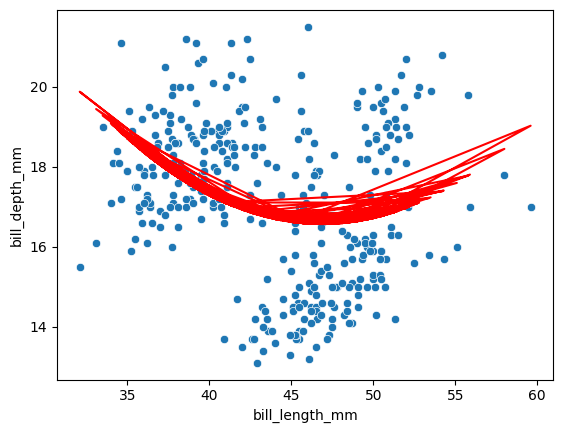

In [115]:
from sklearn.preprocessing import PolynomialFeatures

poly2 = PolynomialFeatures(degree=2)
X_poly2 = poly2.fit_transform(X)
X_line_poly2 = poly2.transform(X)

lr.fit(X_poly2, y)
line2 = lr.predict(X_line_poly2)

plt.figure
sns.scatterplot(x=X['bill_length_mm'], y=y)
plt.plot(X, line2, color='red')

#under fitting

In [116]:
X_train_poly2 = poly2.fit_transform(X_train)
X_test_poly2 = poly2.transform(X_test)

lr.fit(X_train_poly2, y_train)

y_pred_lr2 = lr.predict(X_test_poly2)
mean_squared_error(y_test, y_pred_lr2)

3.4725372179045046

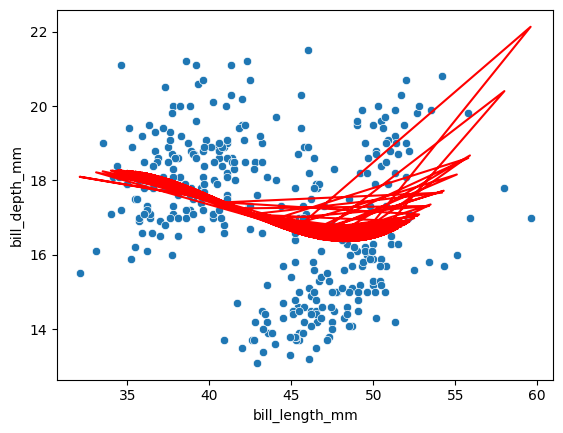

In [117]:
from sklearn.preprocessing import PolynomialFeatures

poly3 = PolynomialFeatures(degree=3)
X_poly3 = poly3.fit_transform(X)
X_line_poly3 = poly3.transform(X)

lr.fit(X_poly3, y)
line3 = lr.predict(X_line_poly3)

plt.figure
sns.scatterplot(x=X['bill_length_mm'], y=y)
plt.plot(X, line3, color='red')

#under fitting

In [118]:
X_train_poly3 = poly3.fit_transform(X_train)
X_test_poly3 = poly3.transform(X_test)

lr.fit(X_train_poly3, y_train)

y_pred_lr3 = lr.predict(X_test_poly3)
mean_squared_error(y_test, y_pred_lr3)

3.509374504692952

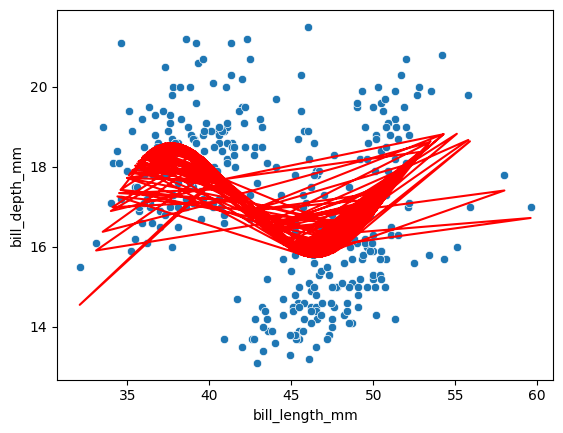

In [119]:
from sklearn.preprocessing import PolynomialFeatures
poly10 = PolynomialFeatures(degree=10)
X_poly10 = poly10.fit_transform(X)
X_line_poly10 = poly10.transform(X)

lr.fit(X_poly10, y)
line10 = lr.predict(X_line_poly10)

plt.figure
sns.scatterplot(x=X['bill_length_mm'], y=y)
plt.plot(X, line10, color='red')

# best fit

In [120]:
X_train_poly10 = poly10.fit_transform(X_train)
X_test_poly10 = poly10.transform(X_test)

lr.fit(X_train_poly10, y_train)

y_pred_lr10 = lr.predict(X_test_poly10)
mean_squared_error(y_test, y_pred_lr10)

3.194684924201363

* Are any of the models above underfitting the data? If so, which ones and how can you tell?
* Are any of thhe models above overfitting the data? If so, which ones and how can you tell?
* Which of the above models do you think fits the data best and why?